In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.json', 'train.json']


In [2]:
train_df = pd.read_json('../input/train.json')
test_df = pd.read_json("../input/test.json")
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,34633,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6727,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,38446,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,2808,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,21731,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39481 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          39481 non-null float64
bedrooms           39481 non-null int64
building_id        39481 non-null object
created            39481 non-null object
description        39481 non-null object
display_address    39481 non-null object
features           39481 non-null object
interest_level     39481 non-null object
latitude           39481 non-null float64
listing_id         39481 non-null int64
longitude          39481 non-null float64
manager_id         39481 non-null object
photos             39481 non-null object
price              39481 non-null int64
street_address     39481 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 4.8+ MB


**Numerical attributes**: bathrooms, bedrooms, latitude, longitude, price  
**Text attributes**: description, display_address, features, street_address  
**Other useful attributes**: created, manager_id  
**Useless attributes**: building_id - captured through latlong, display_address etc,.

In [4]:
print("Train Rows : ", train_df.shape[0])
print("Test Rows : ", test_df.shape[0])

Train Rows :  39481
Test Rows :  9871


In [5]:
print("Number of null rows: ", train_df.isna().sum())
print("Number of null rows: ", test_df.isna().sum())

Number of null rows:  bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64
Number of null rows:  listing_id         0
bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64


In [6]:
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,39481.000000,39481.000000,39481.000000,39481.000000,39481.000000,3.948100e+04
mean,1.213964,1.543933,40.741070,24681.670170,-73.954859,3.817728e+03
std,0.501449,1.115358,0.651838,14255.105309,1.203249,2.334313e+04
min,0.000000,0.000000,0.000000,0.000000,-118.271000,4.300000e+01
25%,1.000000,1.000000,40.728200,12407.000000,-73.991700,2.500000e+03
50%,1.000000,1.000000,40.751800,24665.000000,-73.977900,3.150000e+03
75%,1.000000,2.000000,40.774200,37051.000000,-73.954800,4.108000e+03
max,10.000000,7.000000,44.883500,49351.000000,0.000000,4.490000e+06


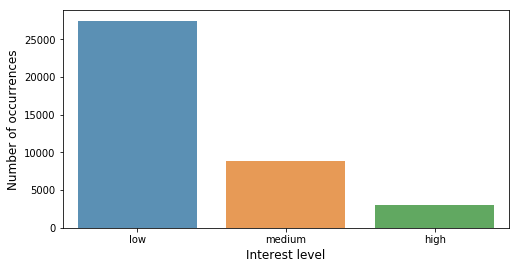

In [7]:
# Analyzing output labels

int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8)
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

**Inference**: The training data is biased towards low interest levels. We have relatively negligible records for high interest records. But this is logically consistent.

In [8]:
train_df.corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.534493,-0.013338,-0.007960,0.013734,0.065493
bedrooms,0.534493,1.000000,-0.007508,-0.005565,0.008779,0.049353
latitude,-0.013338,-0.007508,1.000000,-0.007934,-0.964796,-0.000949
listing_id,-0.007960,-0.005565,-0.007934,1.000000,0.008552,-0.007588
longitude,0.013734,0.008779,-0.964796,0.008552,1.000000,-0.000015
price,0.065493,0.049353,-0.000949,-0.007588,-0.000015,1.000000


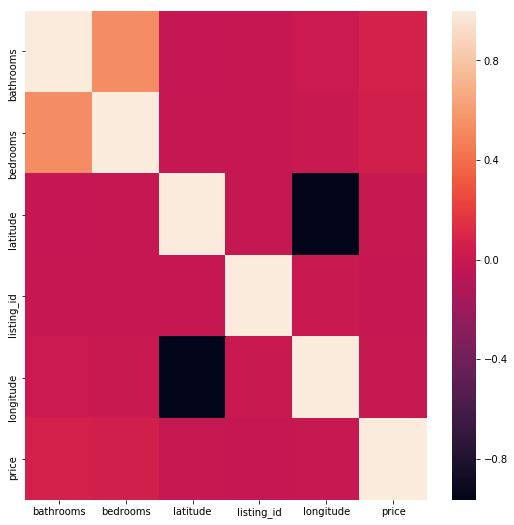

In [9]:
corr = train_df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

**Inference**: Bathrooms and Bedrooms have strong correlation.

# Analysis of "Bathrooms" attribute

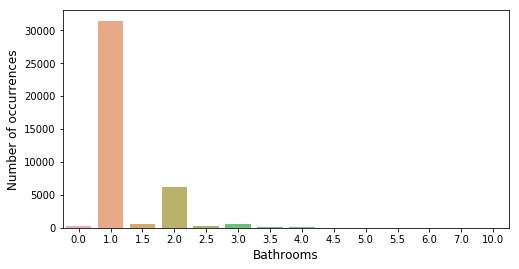

In [10]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Bathrooms', fontsize=12)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


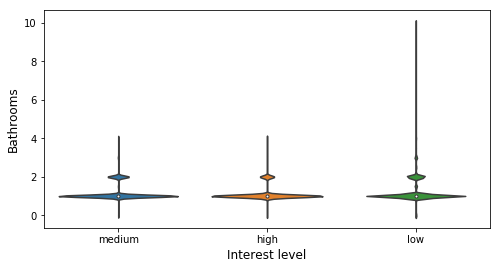

In [11]:
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('Bathrooms', fontsize=12)
plt.show()

If bathrooms are greater than 4 then interest level is low. Due to fewer records having number of bathrooms greater than 4 it makes sense to group everything greater than 4 into 4 itself.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


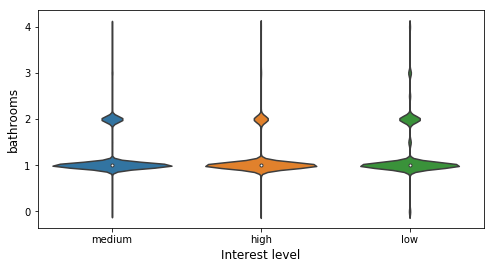

In [12]:
train_df.loc[train_df['bathrooms'] >= 4, 'bathrooms'] = 4
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)
plt.show()

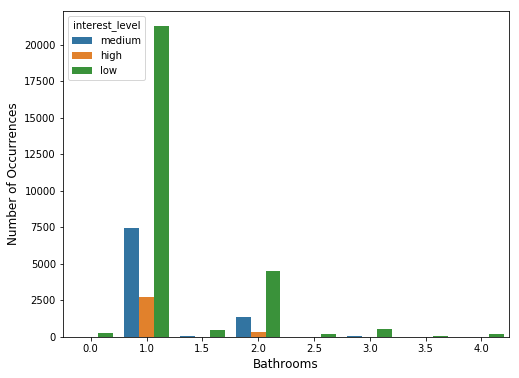

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='bathrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bathrooms', fontsize=12)
plt.show()

The violin plot shows that interest_level has different values for the same number of bathrooms since the quartiles almost coincide. This might mean there isn't a direct correlation between number of bathrooms and interest.

# Analysis of "Bedrooms" Attribute

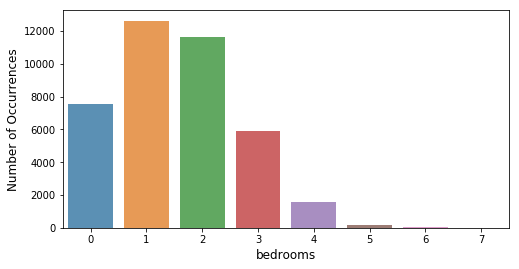

In [14]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

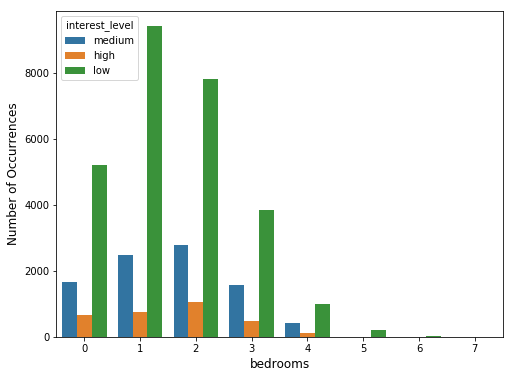

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


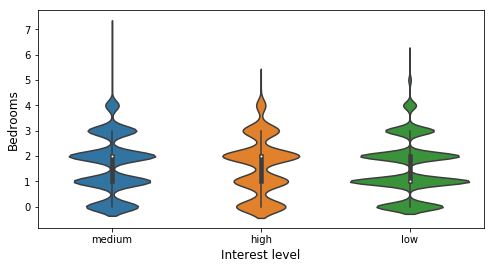

In [16]:
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bedrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('Bedrooms', fontsize=12)
plt.show()

For each category there is a guassian like distribution with respect to number of bedrooms. The quantiles almost coincide for all three categories which might mean that there isn't a direct relation between number of bedrooms and interest.

# Analysis of "Price" attribute

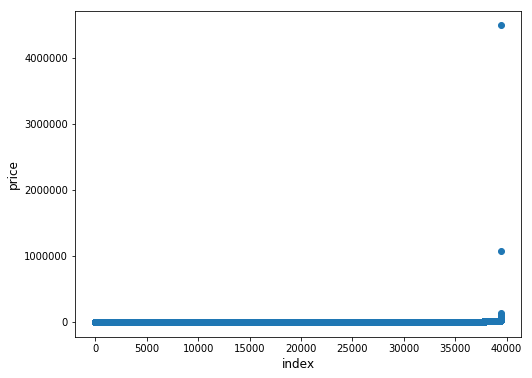

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

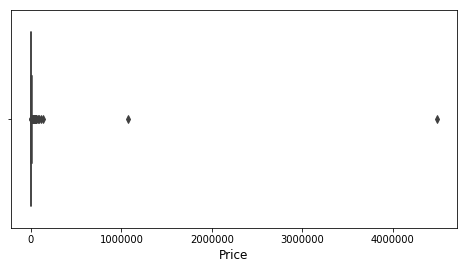

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(x='price', data=train_df)
plt.xlabel('Price', fontsize=12)
plt.show()

In [19]:
print(len(train_df[train_df['price'] >= 100000]))

4


Clearly these are incorrect and can be removed.

In [20]:
train_df.drop(train_df[train_df['price'] >= 100000].index, inplace = True)

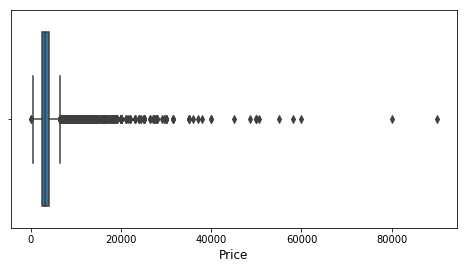

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x='price', data=train_df)
plt.xlabel('Price', fontsize=12)
plt.show()

Clearly there are still a lot of outliers. We can use zscore for removing them, since IRQ rejects a lot of points as shown in boxplot.

In [22]:
price = train_df.price
zscore = (price - price.mean()) / price.std()
zscore.head()

10       -0.283876
100004   -0.347332
100007   -0.167540
100014    1.829208
100026   -0.823252
Name: price, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


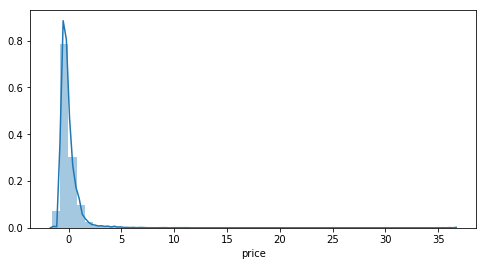

In [23]:
plt.figure(figsize=(8,4))
sns.distplot(zscore)
plt.show()

Usually zscore between -3 and 3 is considered acceptable, however here we can probably go till 5.

In [24]:
print("Number of outliers:", len(zscore[(zscore < -3) | (zscore > 5)]))

Number of outliers: 200


In [25]:
clean_train = pd.DataFrame({'interest_level': train_df.interest_level, 'price': train_df.price, 'zscore': zscore})
clean_train.drop(clean_train[(clean_train.zscore > 5) | (clean_train.zscore < -3)].index, inplace=True)
clean_train.head()

,interest_level,price,zscore
10,medium,3000,-0.283876
100004,high,2850,-0.347332
100007,low,3275,-0.167540
100014,medium,7995,1.829208
100026,medium,1725,-0.823252


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


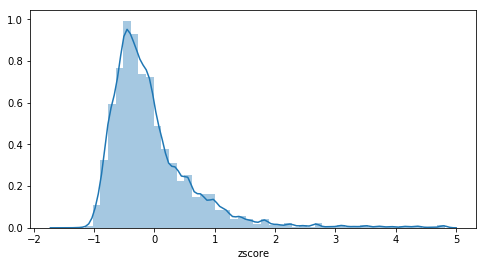

In [26]:
plt.figure(figsize=(8,4))
sns.distplot(clean_train.zscore)
plt.show()

In [27]:
clean_train.describe()

,price,zscore
count,39277.000000,39277.000000
mean,3571.385798,-0.042157
std,1760.968208,0.744960
min,43.000000,-1.534806
25%,2499.000000,-0.495819
50%,3150.000000,-0.220420
75%,4095.000000,0.179352
max,15046.000000,4.812063


Thus a max of 150046 and a min of 43 is a good range for price.

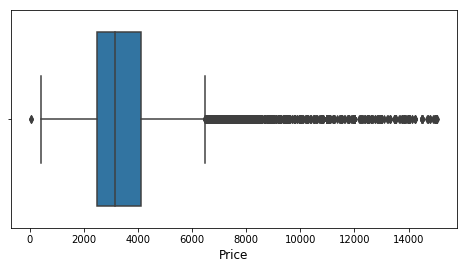

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(x='price', data=clean_train)
plt.xlabel('Price', fontsize=12)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


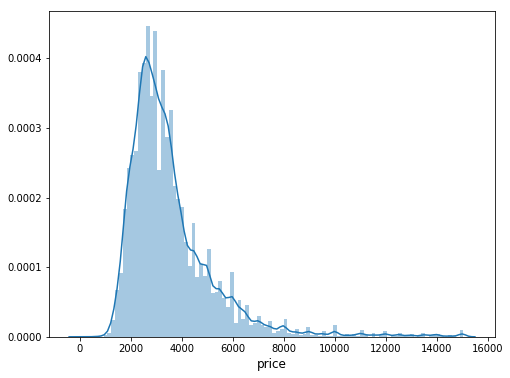

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(clean_train.price.values, bins=100, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

This distribution looks more logical. It has a skewed Guassian-like distribution.

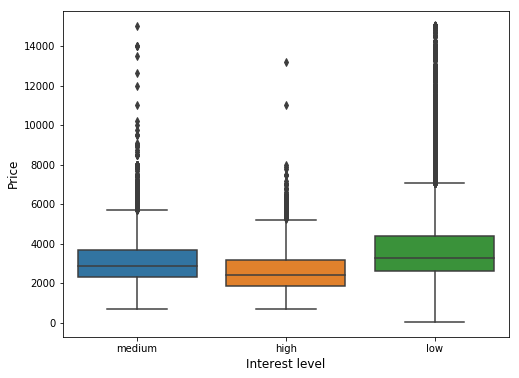

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x='interest_level', y='price', data=clean_train)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

The above plot shows that greater the price lower the interest_level on average which is logically consistent.

# Analysis of "Latitude" attribute

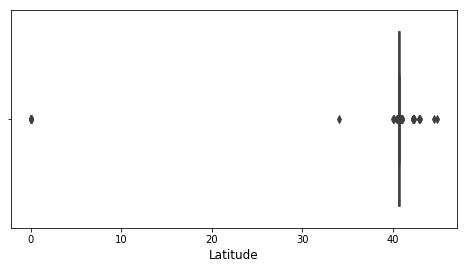

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(x='latitude', data=train_df)
plt.xlabel('Latitude', fontsize=12)
plt.show()

Clearly there are incorrect values for latitude that are close to 0. A lot of values are concentrated from 40.5 to 41. There are not a lot of outliers so it might make sense to approximate or remove all outliers. For analysis, we'll approximate top and bottom 1%.

In [32]:
llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)

print("Lower limit for latitude being set as:", llimit)
print("Upper limit for latitude being set as:", ulimit)

llimit_index = train_df[train_df['latitude'] < llimit].index
ulimit_index = train_df[train_df['latitude'] > ulimit].index

print("Number of rows beign approximated:", len(llimit_index) + len(ulimit_index))

train_df.loc[llimit_index, 'latitude'] = llimit
train_df.loc[ulimit_index, 'latitude'] = ulimit

Lower limit for latitude being set as: 40.6414
Upper limit for latitude being set as: 40.861548
Number of rows beign approximated: 789


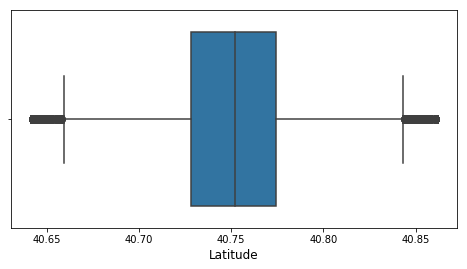

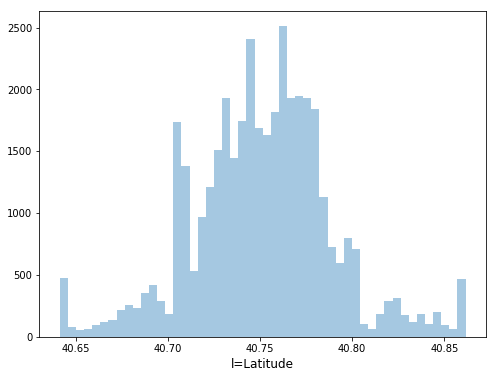

In [33]:
plt.figure(figsize=(8,4))
sns.boxplot(x='latitude', data=train_df)
plt.xlabel('Latitude', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('l=Latitude', fontsize=12)
plt.show()

Although due to our approximation there is a small spike towards the ends, we get a much better distribution now.

# Analysis of "Longitude" attribute

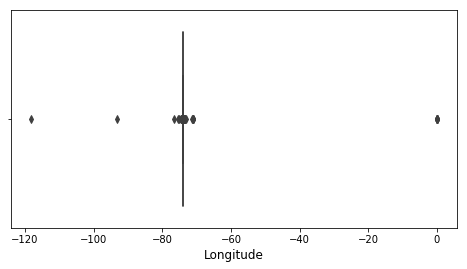

In [34]:
plt.figure(figsize=(8,4))
sns.boxplot(x='longitude', data=train_df)
plt.xlabel('Longitude', fontsize=12)
plt.show()

Once again there are seemingly incorrect values for longitude. We'll adopt the previous approach of approximating the first and last 1% records to get the distribution of remaining records.

In [35]:
llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)

print("Lower limit for longitude being set as:", llimit)
print("Upper limit for longitude being set as:", ulimit)

llimit_index = train_df[train_df['longitude'] < llimit].index
ulimit_index = train_df[train_df['longitude'] > ulimit].index

print("Number of rows beign approximated:", len(llimit_index) + len(ulimit_index))

train_df.loc[llimit_index, 'longitude'] = llimit
train_df.loc[ulimit_index, 'longitude'] = ulimit

Lower limit for longitude being set as: -74.0162
Upper limit for longitude being set as: -73.852428
Number of rows beign approximated: 691


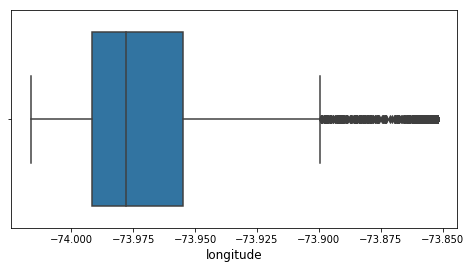

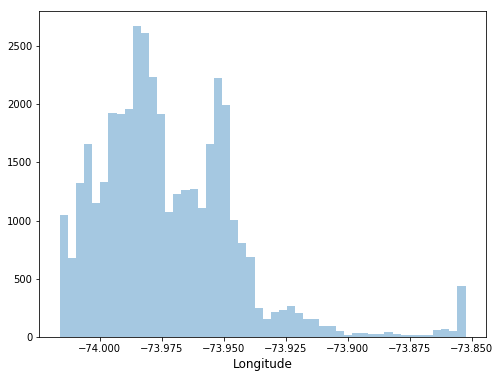

In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(x='longitude', data=train_df)
plt.xlabel('longitude', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('Longitude', fontsize=12)
plt.show()

The right tail of the distribution doesn't look very "nice" though.

# Analysis of LatLong pairs

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


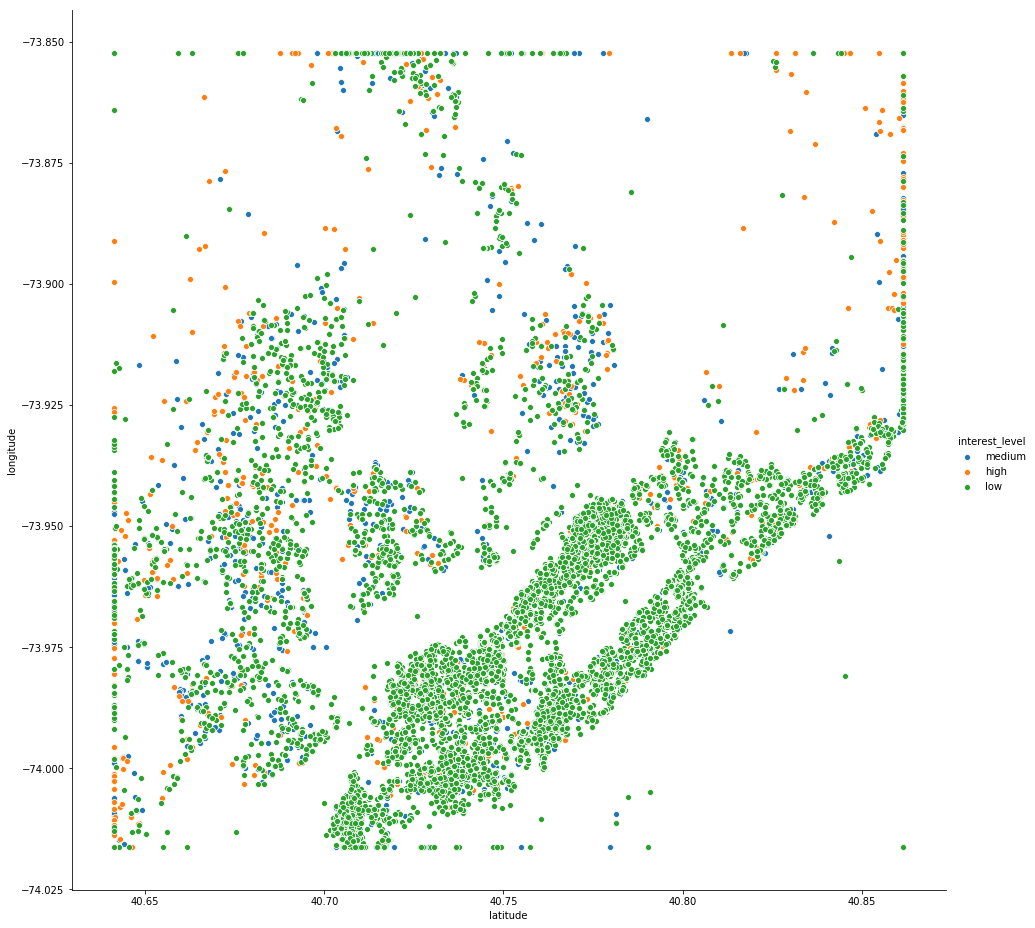

In [37]:
x = sns.pairplot(x_vars=['latitude'], y_vars=['longitude'], data=train_df, hue="interest_level", size=13)
x.savefig("latlong.png")

The lines at the edges are most probably due to our approximation for top and bottom 1% records.

The only pattern I can find is that bottom right are usually low and top left areas have more high interest plots. I was thinking that we can convert the latlong pairs into categorical values by kind of grouping points in the same area if they also have same interest level. But that seems hard here.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


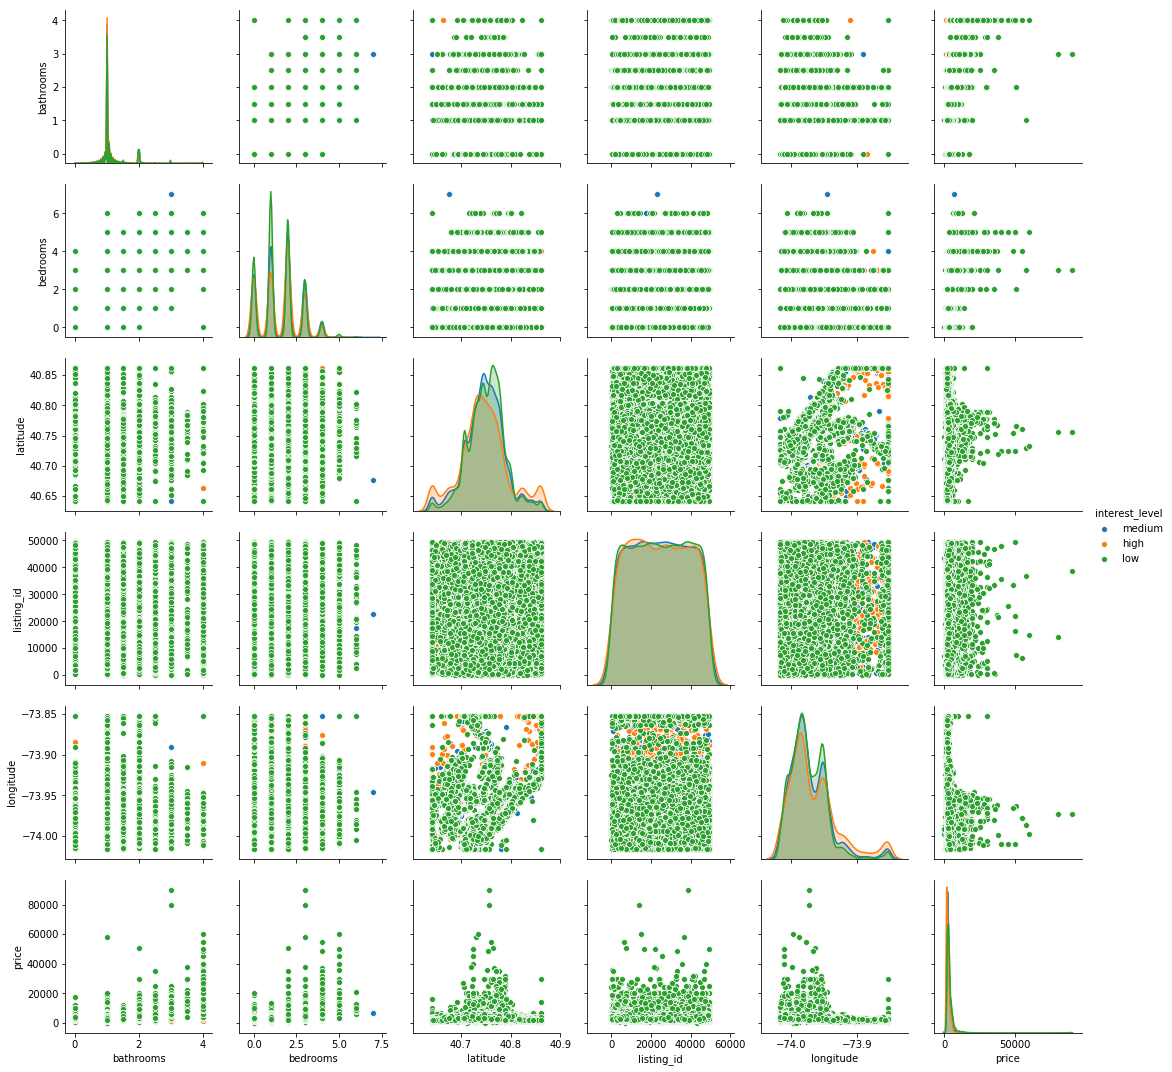

In [38]:
sns.pairplot(train_df, hue='interest_level', size=2.5)
x.savefig("pairplot.png")

# Summary of analysis of numerical attributes

**Numerical attributes**: bathrooms, bedrooms, latitude, longitude, price  

## Bathrooms
- If a house has more than 4 bathrooms then it has only low interest levels. So converting bathroom values greater than 4 to 4 will help analyze data.
- There is a strong correlation between number of bathrooms and number of bedrooms (about 0.5).
- There doesn't seem to be a clear relation between interest level and number of bathrooms since the quartiles coincide for all interest levels.

## Bedrooms
- The number of bedrooms seemed to have reasonable values and a guassian like distribution. There didn't seem any need for sanitization.
- Similar to bathrooms, there doesn't seem to be a correlation between number of bedrooms and interest since the quartiles are almost the same for all interest levels.

## Prices
- There are a few incorrect values i.e. random skips in the distribution. A reasonable upper bound was found to be 15046, by setting the zscore range from -3 to 5.
- However there are around 2000 outliers if Inter Quartile Range is used. The upper bound here seems to be close to 7000. There are some outliers close to 0 also. Dropping or correcting these 2000 values might make a difference.
- There is a clear relation between price and interest level (as seen by the mean). Greater the price, lower the interest level.

## Latitude and Longitude
- Both latitude and longitude had a few incorrect values i.e. random jumps in values. We approximated the top and bottom 1% records to the upper limit and lower limit respectively. We get a guassian like distribution for latitudes but a skewed distribution for longitudes.
- Plotting a scatterplot of latlong pairs doesn't show any special relationship between areas and interest level except maybe that bottom right points are usually low and top left points have more high interest plots. Converting the latlong pairs into categorical values by grouping points in the same area if they also have same interest level would help us combine the information provided by latitude and longitude, however that doesn't seem to do any benefit here. But its worth exploring.

We have to deal with a lot of outliers in this data set. We have to decide on what points are outliers and how to deal with them.  
For identifying outliers: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba  
We can either remove or approximate outliers.